#                                     Assignment 5: PCA on MNIST Dataset

 <pre>
 1. Please download the data set and extract it to current directory
 2. Run the above cells you get the data in readable formate and pixel formate (60000 * 28 * 28), you can do operations on train_data
 3. Implement the PCA algorithm on the train data.
     i.   You can do the pricipal component analysis on smaller data &lt; 60000 (not less than 10k points) data points
     ii.  Plot the eigen values and eigen vectors
     iii. Find the varaince explained based on the eigen values we got in step (ii)
     iii. Select top two eigen values, corresponding eigen vectors and project the data points on those vectors
     iv.  Plot the resultent lower dimension points with hue="data_labels"
 4. Use the sklearn libraries pca function
     i.   Find out the amount of variance explained by each component, select the top components based on this result
     ii.  Transform the data into lower dimensional data
     iii. Plot the resultent lower dimension points with hue="data_labels"
 5. Compare the result of both step 3 and step 4
</pre>

In [75]:
import os
import struct
import numpy as np

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [76]:
train_data = list(read(dataset='training',path='.'))

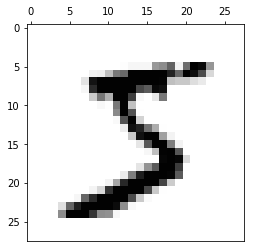

In [4]:
label, pixel = train_data[0]
show(pixel)


## Step 1: Convert the data into a Dataframe

Taking a subset of 20k data pts from the Data Set for faster computation.

In [77]:
import pandas as pd

mnist=train_data[:20000]
lst=[]
for i in mnist:
    d={}
    l,p=i
    c=p.flatten()
    d[0]=l
    for x in range(0,784):
        d[x+1]=c[x]
    lst.append(d)
data=pd.DataFrame(lst)

print data.head()
    

   0    1    2    3    4    5    6    7    8    9   ...   775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


## Step 2: Standardize the data

In [78]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

data.iloc[:,1:785]=scaler.fit_transform(data.iloc[:,1:785])

In [79]:
print data.head()

   0    1    2    3    4    5    6    7    8    9   ...        775      776  \
0    5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...  -0.031856 -0.02745   
1    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...  -0.031856 -0.02745   
2    4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...  -0.031856 -0.02745   
3    1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...  -0.031856 -0.02745   
4    9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...  -0.031856 -0.02745   

        777       778       779       780  781  782  783  784  
0 -0.019556 -0.016877 -0.014286 -0.007071  0.0  0.0  0.0  0.0  
1 -0.019556 -0.016877 -0.014286 -0.007071  0.0  0.0  0.0  0.0  
2 -0.019556 -0.016877 -0.014286 -0.007071  0.0  0.0  0.0  0.0  
3 -0.019556 -0.016877 -0.014286 -0.007071  0.0  0.0  0.0  0.0  
4 -0.019556 -0.016877 -0.014286 -0.007071  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]


## Step 3: Find the covariance matrix 

In [81]:
pixeldf=pd.DataFrame(data.iloc[:,1:785])
pixelcov=pixeldf.cov()
#print pixelcov

## Step 4: Find the eigenvalues and the corresponding vectors

In [82]:
eig_vals, eig_vecs = np.linalg.eig(pixelcov)

In [85]:
from collections import OrderedDict

dval={}
for i in range(len(eig_vals)):
    dval[eig_vals[i]]=eig_vecs[:,i].dot(-1)

descdval=OrderedDict(sorted(dval.items(), reverse=True, key=lambda t: t[0]))
x=descdval.iteritems()
a,a1=next(x)
b,b1=next(x)
print a,b #prints the top 2 eigenvalues
print a1
print b1

40.4936046028 29.9185719207
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -1.36831218e-04   4.90354223e-05   2.63947398e-04   2.63947398e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.65130583e-03   2.55197957e-03   3.42625862e-03
   4.49088489e-03   5.52131335e-03   5.00419007e-03   3.95209767e-03
   3.33622459e-03   2.95363261e-03   2.51271503e-03   1.29327567e-03
   5.11042319e-04   8.68422164e-04   3.02071415e-04  -1.00749869e-03
  -4.77687168e-04  -1.32164389e-04  -2.60047894e-04   7.65917784e-06
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.0

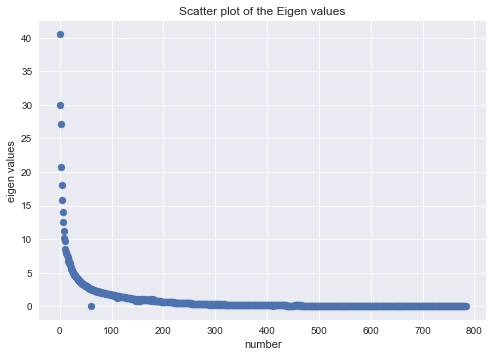

In [84]:
import matplotlib.pyplot as plt
x=range(len(eig_vals))
plt.scatter(x,eig_vals)
plt.title('Scatter plot of the Eigen values')
plt.xlabel('number')
plt.ylabel('eigen values')
plt.show()

## Step 5: Explained Variance

To see how many components explain maximum data

In [11]:
import plotly.plotly as py
from plotly import __version__
from plotly.offline import init_notebook_mode, plot
from plotly.graph_objs import *
import plotly.tools as tls

init_notebook_mode(connected=True)

tls.set_credentials_file(username='divban', api_key='X4hoaL9vnTsgA69HEnBB')

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(len(eig_vals))],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(len(eig_vals))], 
        y=cum_var_exp,
        name='cumulative explained variance')

data1 = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),xaxis=XAxis(title='Principal Components'),
        title='Explained variance by different principal components')

fig = Figure(data=data1, layout=layout)
py.iplot(fig)

The plot above shows that 80% of the variance in the data can be explained by the first 135 principal components out of the 784 components and that there are many principal components that do not convey much meaning in the data and can be dropped.  
Also, we can see that the top 2 principal components only explain about 10% of the data.

## Step 6: Performing dot product and projecting to 2D

In [86]:
i=descdval.itervalues()
a=i.next().reshape(784,1)
b=i.next().reshape(784,1)
matrix_w = np.hstack((a,b))

Y=pixeldf.dot(matrix_w)

final=pd.DataFrame()
final['lbl']=data.iloc[:,0]
final['PC1']=Y[0]
final['PC2']=Y[1]

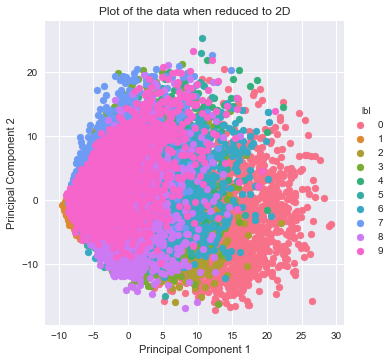

In [87]:
import seaborn as sns

sns.FacetGrid(final, hue='lbl', size=5) \
   .map(plt.scatter,'PC1','PC2') \
   .add_legend();

plt.title('Plot of the data when reduced to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show();


In [42]:
traces = []

for i in range(10):
    trace = Scatter(
        x=final.loc[final['lbl'] == i, 'PC1'],
        y=final.loc[final['lbl'] == i, 'PC2'],
        mode='markers',
        name=i,
    ) 
    traces.append(trace)


dt = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=dt, layout=layout)
py.iplot(fig)

## Performing PCA using sklearn.decomposition 

In [20]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA()
Y_sklearn = sklearn_pca.fit_transform(pixeldf)

print "Percent of variance explained by the different components"
print sklearn_pca.explained_variance_


Percent of variance explained by the different components
[  4.04915799e+01   2.99170760e+01   2.71637052e+01   2.07169439e+01
   1.80309569e+01   1.58293809e+01   1.40354059e+01   1.26119599e+01
   1.12694655e+01   1.02209135e+01   9.74467669e+00   8.54099656e+00
   8.01390541e+00   7.87110113e+00   7.57964191e+00   7.28331991e+00
   6.78990506e+00   6.68051750e+00   6.44858437e+00   6.37419072e+00
   6.06301519e+00   5.82369120e+00   5.53434174e+00   5.37627756e+00
   5.18508855e+00   5.02778846e+00   4.96190329e+00   4.78533404e+00
   4.66483359e+00   4.57776628e+00   4.43416104e+00   4.36787098e+00
   4.27048452e+00   4.16138081e+00   4.12379855e+00   4.03021968e+00
   3.92792195e+00   3.87910402e+00   3.80098863e+00   3.74324156e+00
   3.66513389e+00   3.43749359e+00   3.37758052e+00   3.34400100e+00
   3.30102048e+00   3.25428254e+00   3.20485919e+00   3.14739132e+00
   3.12070249e+00   3.06741568e+00   3.05449617e+00   2.93965716e+00
   2.92926906e+00   2.87223050e+00   2.812203

In [23]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(pixeldf)
print sklearn_pca.explained_variance_
print sklearn_pca.components_

[ 40.49157992  29.91707575]
[[  1.21294253e-18   2.26807772e-18  -4.34475374e-20 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -2.95448495e-18   8.29330182e-17  -6.02414811e-19 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]]


In [18]:
finalp=pd.DataFrame()
finalp['lbl']=data.iloc[:,0]
finalp['PC1']=Y_sklearn.T[0]
finalp['PC2']=Y_sklearn.T[1]

traces = []

for i in range(10):
    trace = Scatter(
        x=finalp.loc[finalp['lbl'] == i, 'PC1'],
        y=finalp.loc[finalp['lbl'] == i, 'PC2'],
        mode='markers',
        name=i,
    ) 
    traces.append(trace)


dt = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=dt, layout=layout)
py.iplot(fig)

The plot produced by the PCA performed using the inbuilt function seems to be the exact mirror image of the plot produced by the step by step process.
We can see that a lot of information is lost with the reduction to 2D since most of the points are almost indistinguishable.